In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import numpy as np
import math
import matplotlib.pyplot as plt
import random

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.drop(['PassengerId', 'Ticket'], axis=1, inplace=True)
test.drop(['PassengerId', 'Ticket'], axis=1, inplace=True)

In [4]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S


In [5]:
print('Zero values in train name = ' + str(train['Name'].isnull().sum()))
print('Zero values in train sex = ' + str(train['Sex'].isnull().sum()))
print('Zero values in train cabin = ' + str(train['Cabin'].isnull().sum()))
print('Zero values in train embarked = ' + str(train['Embarked'].isnull().sum()))

Zero values in train name = 0
Zero values in train sex = 0
Zero values in train cabin = 687
Zero values in train embarked = 2


In [6]:
train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
print('Zero values in test name = ' + str(test['Name'].isnull().sum()))
print('Zero values in test sex = ' + str(test['Sex'].isnull().sum()))
print('Zero values in test cabin = ' + str(test['Cabin'].isnull().sum()))
print('Zero values in test embarked = ' + str(test['Embarked'].isnull().sum()))

Zero values in test name = 0
Zero values in test sex = 0
Zero values in test cabin = 327
Zero values in test embarked = 0


In [8]:
test.describe()

,Pclass,Age,SibSp,Parch,Fare
count,418.000000,332.000000,418.000000,418.000000,417.000000
mean,2.265550,30.272590,0.447368,0.392344,35.627188
std,0.841838,14.181209,0.896760,0.981429,55.907576
min,1.000000,0.170000,0.000000,0.000000,0.000000
25%,1.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,27.000000,0.000000,0.000000,14.454200
75%,3.000000,39.000000,1.000000,0.000000,31.500000
max,3.000000,76.000000,8.000000,9.000000,512.329200


# Extract title out of name

In [9]:
for i in range(len(train)):
    if 'Mrs.' in train['Name'][i]:
        train.loc[i,'Name'] = 'Mrs'
    elif 'Sir.' in train['Name'][i]:
        train.loc[i,'Name'] = 'Royalty'
    elif 'Mr.' in train['Name'][i]:
        train.loc[i,'Name'] = 'Mr'
    elif 'Capt.' in train['Name'][i]:
        train.loc[i,'Name'] = 'Officer'
    elif 'Col.' in train['Name'][i]:
        train.loc[i,'Name'] = 'Officer'
    elif 'Countess.' in train['Name'][i]:
        train.loc[i,'Name'] = 'Royalty'
    elif 'Dona.' in train['Name'][i]:
        train.loc[i,'Name'] = 'Royalty'
    elif 'Don.' in train['Name'][i]:
        train.loc[i,'Name'] = 'Royalty'
    elif 'Dr.' in train['Name'][i]:
        train.loc[i,'Name'] = 'Officer'
    elif 'Jonkheer.' in train['Name'][i]:
        train.loc[i,'Name'] = 'Royalty'
    elif 'Lady.' in train['Name'][i]:
        train.loc[i,'Name'] = 'Royalty'
    elif 'Major.' in train['Name'][i]:
        train.loc[i,'Name'] = 'Officer'
    elif 'Master.' in train['Name'][i]:
        train.loc[i,'Name'] = 'Master'
    elif 'Mlle.' in train['Name'][i]:
        train.loc[i,'Name'] = 'Miss'
    elif 'Mme.' in train['Name'][i]:
        train.loc[i,'Name'] = 'Mrs'
    elif 'Ms.' in train['Name'][i]:
        train.loc[i,'Name'] = 'Mrs'
    elif 'Rev.' in train['Name'][i]:
        train.loc[i,'Name'] = 'Officer'
    elif 'Miss.' in train['Name'][i]:
        train.loc[i,'Name'] = 'Miss'

In [10]:
for i in range(len(test)):
    if 'Mrs.' in test['Name'][i]:
        test.loc[i,'Name'] = 'Mrs'
    elif 'Sir.' in test['Name'][i]:
        test.loc[i,'Name'] = 'Royalty'
    elif 'Mr.' in test['Name'][i]:
        test.loc[i,'Name'] = 'Mr'
    elif 'Capt.' in test['Name'][i]:
        test.loc[i,'Name'] = 'Officer'
    elif 'Col.' in test['Name'][i]:
        test.loc[i,'Name'] = 'Officer'
    elif 'Countess.' in test['Name'][i]:
        test.loc[i,'Name'] = 'Royalty'
    elif 'Dona.' in test['Name'][i]:
        test.loc[i,'Name'] = 'Royalty'
    elif 'Don.' in test['Name'][i]:
        test.loc[i,'Name'] = 'Royalty'
    elif 'Dr.' in test['Name'][i]:
        test.loc[i,'Name'] = 'Officer'
    elif 'Jonkheer.' in test['Name'][i]:
        test.loc[i,'Name'] = 'Royalty'
    elif 'Lady.' in test['Name'][i]:
        test.loc[i,'Name'] = 'Royalty'
    elif 'Major.' in test['Name'][i]:
        test.loc[i,'Name'] = 'Officer'
    elif 'Master.' in test['Name'][i]:
        test.loc[i,'Name'] = 'Master'
    elif 'Mlle.' in test['Name'][i]:
        test.loc[i,'Name'] = 'Miss'
    elif 'Mme.' in test['Name'][i]:
        test.loc[i,'Name'] = 'Mrs'
    elif 'Ms.' in test['Name'][i]:
        test.loc[i,'Name'] = 'Mrs'
    elif 'Rev.' in test['Name'][i]:
        test.loc[i,'Name'] = 'Officer'
    elif 'Miss.' in test['Name'][i]:
        test.loc[i,'Name'] = 'Miss'

# Fill in the small amount of missing values for test fare and train embarked

In [11]:
test['Fare'].fillna(test['Fare'].mean(), inplace=True)
train['Embarked'].fillna(train['Embarked'].value_counts().index[0], inplace=True)

# Filling in missing values for age

In [12]:
train.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Cabin', 'Embarked'],
      dtype='object')

In [13]:
age_selection_train = train[['Age', 'SibSp', 'Parch', 'Fare', 'Pclass', 'Name', 'Sex']].dropna()
age_selection_test = test[['Age', 'SibSp', 'Parch', 'Fare', 'Pclass', 'Name', 'Sex']].dropna()
age_selection = age_selection_train.append(age_selection_test)
age_selection['Fare'] = age_selection['Fare'].astype(int)
grouped_age = age_selection.groupby(['Name','Pclass','Sex'])['Age'].median()
print(grouped_age)

Name     Pclass  Sex   
Master   1       male       6.0
         2       male       2.0
         3       male       6.0
Miss     1       female    30.0
         2       female    20.0
         3       female    18.0
Mr       1       male      41.5
         2       male      30.0
         3       male      26.0
Mrs      1       female    45.0
         2       female    30.0
         3       female    31.0
Officer  1       female    49.0
                 male      52.0
         2       male      41.5
Royalty  1       female    39.0
                 male      40.0
Name: Age, dtype: float64


In [14]:
for i in range(len(train)):
    if not train['Age'][i] > 0:
        if train.loc[i,'Name'] == 'Master':
            if train.loc[i,'Pclass'] == 1:
                train.loc[i,'Age'] = 6
            elif train.loc[i,'Pclass'] == 2:
                train.loc[i,'Age'] = 2
            elif train.loc[i,'Pclass'] == 3:
                train.loc[i,'Age'] = 6
        elif train.loc[i,'Name'] == 'Miss':
            if train.loc[i,'Pclass'] == 1:
                train.loc[i,'Age'] = 30
            elif train.loc[i,'Pclass'] == 2:
                train.loc[i,'Age'] = 21
            elif train.loc[i,'Pclass'] == 3:
                train.loc[i,'Age'] = 19
        elif train.loc[i,'Name'] == 'Mr':
            if train.loc[i,'Pclass'] == 1:
                train.loc[i,'Age'] = 40
            elif train.loc[i,'Pclass'] == 2:
                train.loc[i,'Age'] = 31
            elif train.loc[i,'Pclass'] == 3:
                train.loc[i,'Age'] = 29
        elif train.loc[i,'Name'] == 'Mrs':
            if train.loc[i,'Pclass'] == 1:
                train.loc[i,'Age'] = 43
            elif train.loc[i,'Pclass'] == 2:
                train.loc[i,'Age'] = 31
            elif train.loc[i,'Pclass'] == 3:
                train.loc[i,'Age'] = 34
        elif train.loc[i,'Name'] == 'Officer':
            if train.loc[i,'Pclass'] == 1:
                if train.loc[i,'Sex'] == 'female':
                    train.loc[i,'Age'] = 49
                elif train.loc[i,'Sex'] == 'male':
                    train.loc[i,'Age'] = 52
            elif train.loc[i,'Pclass'] == 2:
                train.loc[i,'Age'] = 42
        elif train.loc[i,'Name'] == 'Royalty':
            if train.loc[i,'Pclass'] == 1:
                if train.loc[i,'Sex'] == 'female':
                    train.loc[i,'Age'] = 39
                elif train.loc[i,'Sex'] == 'male':
                    train.loc[i,'Age'] = 40
for i in range(len(test)):
    if not test['Age'][i] > 0:
        if test.loc[i,'Name'] == 'Master':
            if test.loc[i,'Pclass'] == 1:
                test.loc[i,'Age'] = 6
            elif test.loc[i,'Pclass'] == 2:
                test.loc[i,'Age'] = 2
            elif test.loc[i,'Pclass'] == 3:
                test.loc[i,'Age'] = 6
        elif test.loc[i,'Name'] == 'Miss':
            if test.loc[i,'Pclass'] == 1:
                test.loc[i,'Age'] = 30
            elif test.loc[i,'Pclass'] == 2:
                test.loc[i,'Age'] = 21
            elif test.loc[i,'Pclass'] == 3:
                test.loc[i,'Age'] = 19
        elif test.loc[i,'Name'] == 'Mr':
            if test.loc[i,'Pclass'] == 1:
                test.loc[i,'Age'] = 40
            elif test.loc[i,'Pclass'] == 2:
                test.loc[i,'Age'] = 31
            elif test.loc[i,'Pclass'] == 3:
                test.loc[i,'Age'] = 29
        elif test.loc[i,'Name'] == 'Mrs':
            if test.loc[i,'Pclass'] == 1:
                test.loc[i,'Age'] = 43
            elif test.loc[i,'Pclass'] == 2:
                test.loc[i,'Age'] = 31
            elif test.loc[i,'Pclass'] == 3:
                test.loc[i,'Age'] = 34
        elif test.loc[i,'Name'] == 'Officer':
            if test.loc[i,'Pclass'] == 1:
                if test.loc[i,'Sex'] == 'female':
                    test.loc[i,'Age'] = 49
                elif test.loc[i,'Sex'] == 'male':
                    test.loc[i,'Age'] = 52
            elif test.loc[i,'Pclass'] == 2:
                test.loc[i,'Age'] = 42
        elif test.loc[i,'Name'] == 'Royalty':
            if test.loc[i,'Pclass'] == 1:
                if test.loc[i,'Sex'] == 'female':
                    test.loc[i,'Age'] = 39
                elif test.loc[i,'Sex'] == 'male':
                    test.loc[i,'Age'] = 40

# Extract cabin class out of cabin

# Filling in missing values for cabin

In [15]:
# To much missing values for cabin so dropping it
train.drop(['Cabin'], axis=1, inplace=True)
test.drop(['Cabin'], axis=1, inplace=True)

# Visualizations

In [16]:
train.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

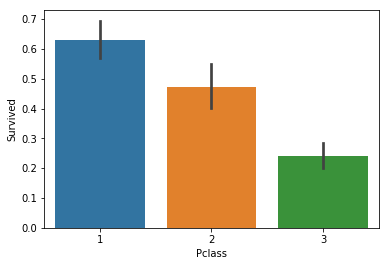

In [17]:
import seaborn as sns

sns.barplot(y=train['Survived'], x=train['Pclass'])

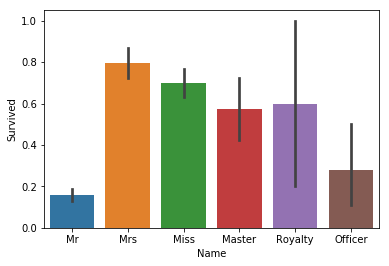

In [18]:
sns.barplot(y=train['Survived'], x=train['Name'])

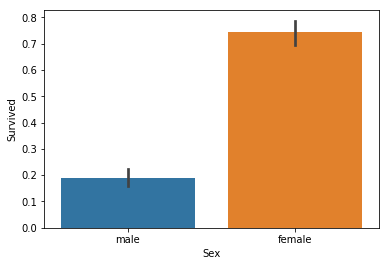

In [19]:
sns.barplot(y=train['Survived'], x=train['Sex'])

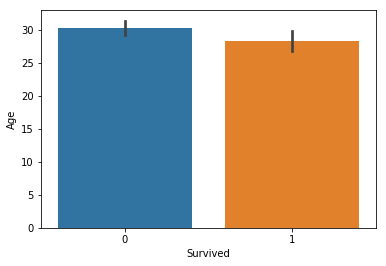

In [20]:
sns.barplot(x=train['Survived'], y=train['Age'])

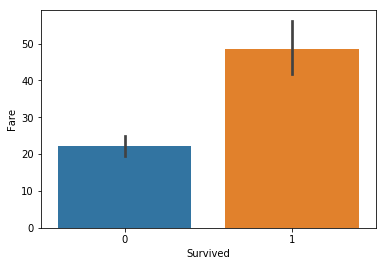

In [21]:
sns.barplot(x=train['Survived'], y=train['Fare'])

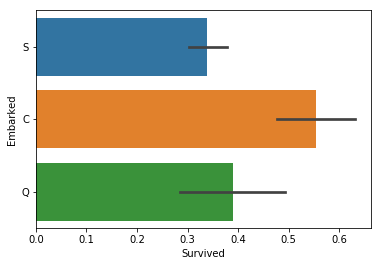

In [22]:
sns.barplot(x=train['Survived'], y=train['Embarked'])

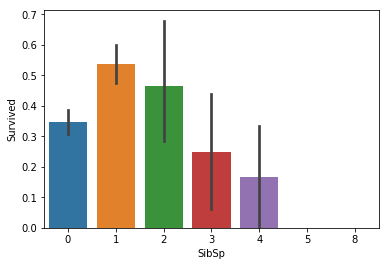

In [23]:
sns.barplot(y=train['Survived'], x=train['SibSp'])

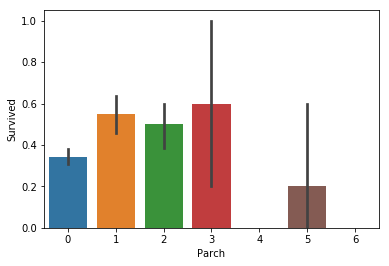

In [24]:
sns.barplot(y=train['Survived'], x=train['Parch'])

# SibSp + Parch into familysize

In [25]:
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1
test['FamilySize'] = train['SibSp'] + train['Parch'] + 1
train.drop(['SibSp'], axis=1, inplace=True)
test.drop(['SibSp'], axis=1, inplace=True)
train.drop(['Parch'], axis=1, inplace=True)
test.drop(['Parch'], axis=1, inplace=True)

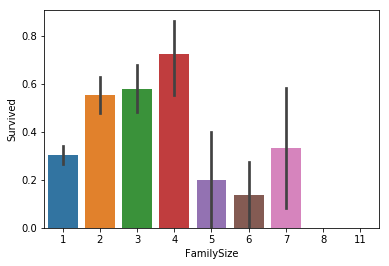

In [26]:
sns.barplot(y=train['Survived'], x=train['FamilySize'])

# Combine FamilySize 8 + 11 because both have 0 change of surviving

In [27]:
for i in range(len(train)):
    if train.loc[i,'FamilySize'] == 11:
        train.loc[i,'FamilySize'] = 8
for i in range(len(test)):
    if test.loc[i,'FamilySize'] == 11:
        test.loc[i,'FamilySize'] = 8

# Hot encode titles

In [28]:
enc_label = LabelEncoder()
label_encoded = enc_label.fit_transform(train['Name'])
enc_onehot = OneHotEncoder(sparse=False)
hot_encoded = enc_onehot.fit_transform(label_encoded.reshape(-1, 1))
enc_label.classes_

array(['Master', 'Miss', 'Mr', 'Mrs', 'Officer', 'Royalty'], dtype=object)

In [29]:
train.drop(['Name'], axis=1, inplace=True)
train['TitleMaster'] = hot_encoded[:,0]
train['TitleMiss'] = hot_encoded[:,1]
train['TitleMr'] = hot_encoded[:,2]
train['TitleMrs'] = hot_encoded[:,3]
train['TitleOfficer'] = hot_encoded[:,4]

In [30]:
label_encoded = enc_label.fit_transform(test['Name'])
hot_encoded = enc_onehot.fit_transform(label_encoded.reshape(-1, 1))
enc_label.classes_

array(['Master', 'Miss', 'Mr', 'Mrs', 'Officer', 'Royalty'], dtype=object)

In [31]:
test.drop(['Name'], axis=1, inplace=True)
test['TitleMaster'] = hot_encoded[:,0]
test['TitleMiss'] = hot_encoded[:,1]
test['TitleMr'] = hot_encoded[:,2]
test['TitleMrs'] = hot_encoded[:,3]
test['TitleOfficer'] = hot_encoded[:,4]

# Hot encode class

In [32]:
label_encoded = enc_label.fit_transform(train['Pclass'])
hot_encoded = enc_onehot.fit_transform(label_encoded.reshape(-1, 1))
enc_label.classes_

array([1, 2, 3], dtype=int64)

In [33]:
train.drop(['Pclass'], axis=1, inplace=True)
train['Class1'] = hot_encoded[:,0]
train['Class2'] = hot_encoded[:,1]
train['Class3'] = hot_encoded[:,2]

In [34]:
label_encoded = enc_label.fit_transform(test['Pclass'])
hot_encoded = enc_onehot.fit_transform(label_encoded.reshape(-1, 1))
enc_label.classes_

array([1, 2, 3], dtype=int64)

In [35]:
test.drop(['Pclass'], axis=1, inplace=True)
test['Class1'] = hot_encoded[:,0]
test['Class2'] = hot_encoded[:,1]
test['Class3'] = hot_encoded[:,2]

# Encode sex

In [36]:
label_encoded = enc_label.fit_transform(train['Sex'])
train['Sex'] = label_encoded

In [37]:
label_encoded = enc_label.fit_transform(test['Sex'])
test['Sex'] = label_encoded

# Hot encode family size

In [38]:
label_encoded = enc_label.fit_transform(train['FamilySize'])
hot_encoded = enc_onehot.fit_transform(label_encoded.reshape(-1, 1))
enc_label.classes_

array([1, 2, 3, 4, 5, 6, 7, 8], dtype=int64)

In [39]:
train.drop(['FamilySize'], axis=1, inplace=True)
train['Family1'] = hot_encoded[:,0]
train['Family2'] = hot_encoded[:,1]
train['Family3'] = hot_encoded[:,2]
train['Family4'] = hot_encoded[:,3]
train['Family5'] = hot_encoded[:,4]
train['Family6'] = hot_encoded[:,5]
train['Family7'] = hot_encoded[:,6]
train['Family8and11'] = hot_encoded[:,7]

In [40]:
label_encoded = enc_label.fit_transform(test['FamilySize'])
hot_encoded = enc_onehot.fit_transform(label_encoded.reshape(-1, 1))
enc_label.classes_

array([1, 2, 3, 4, 5, 6, 7, 8], dtype=int64)

In [41]:
test.drop(['FamilySize'], axis=1, inplace=True)
test['Family1'] = hot_encoded[:,0]
test['Family2'] = hot_encoded[:,1]
test['Family3'] = hot_encoded[:,2]
test['Family4'] = hot_encoded[:,3]
test['Family5'] = hot_encoded[:,4]
test['Family6'] = hot_encoded[:,5]
test['Family7'] = hot_encoded[:,6]
test['Family8and11'] = hot_encoded[:,7]

# Hot encode embarked

In [42]:
label_encoded = enc_label.fit_transform(train['Embarked'])
hot_encoded = enc_onehot.fit_transform(label_encoded.reshape(-1, 1))
enc_label.classes_

array(['C', 'Q', 'S'], dtype=object)

In [43]:
train.drop(['Embarked'], axis=1, inplace=True)
train['EmbarkedC'] = hot_encoded[:,0]
train['EmbarkedQ'] = hot_encoded[:,1]
train['EmbarkedS'] = hot_encoded[:,2]

In [44]:
label_encoded = enc_label.fit_transform(test['Embarked'])
hot_encoded = enc_onehot.fit_transform(label_encoded.reshape(-1, 1))
enc_label.classes_

array(['C', 'Q', 'S'], dtype=object)

In [45]:
test.drop(['Embarked'], axis=1, inplace=True)
test['EmbarkedC'] = hot_encoded[:,0]
test['EmbarkedQ'] = hot_encoded[:,1]
test['EmbarkedS'] = hot_encoded[:,2]

# Hot encode cabin

# Model training

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()
train[['Age', 'Fare']] = std_scale.fit_transform(train[['Age', 'Fare']])
test[['Age', 'Fare']] = std_scale.transform(test[['Age', 'Fare']])
x_train = train.drop(['Survived'], axis=1)
y_train = train['Survived']

x_train_train, x_valid, y_train_train, y_valid = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [47]:
scores = {}

In [48]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import f1_score

print('LogisticRegressionCV running')
clf = LogisticRegressionCV()
clf.fit(x_train_train, y_train_train)
valid_pred = clf.predict(x_valid)
scores[clf] = f1_score(y_valid, valid_pred)

LogisticRegressionCV running


In [49]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

print('SVC running')
svc = SVC(random_state=42)
parameters = {'kernel':('linear', 'rbf'), 
              'C':[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1,10,50,100,200,300,1000], 
              'gamma': [0.001,0.01,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]}
clf = GridSearchCV(svc, parameters)
clf.fit(x_train_train, y_train_train)
clf = SVC(**clf.best_params_)
clf.fit(x_train_train, y_train_train)
valid_pred = clf.predict(x_valid)
scores[clf] = f1_score(y_valid, valid_pred)

SVC running


In [50]:
from sklearn.linear_model import SGDClassifier

print('SGDClassifier running')
sgd = SGDClassifier(max_iter=1000, random_state=42)
parameters = {'l1_ratio':np.arange(0, 1, 0.01).tolist()}
clf = GridSearchCV(sgd, parameters)
clf.fit(x_train_train, y_train_train)
clf = SGDClassifier(max_iter=1000, **clf.best_params_)
clf.fit(x_train_train, y_train_train)
valid_pred = clf.predict(x_valid)
scores[clf] = f1_score(y_valid, valid_pred)

SGDClassifier running


In [51]:
from sklearn.neighbors import KNeighborsClassifier

print('KNeighborsClassifier running')
knn = KNeighborsClassifier()
parameters = {'n_neighbors':np.arange(1, 51, 1).tolist(), 'weights':('distance', 'uniform')}
clf = GridSearchCV(knn, parameters)
clf.fit(x_train_train, y_train_train)
clf = KNeighborsClassifier(**clf.best_params_)
clf.fit(x_train_train, y_train_train)
valid_pred = clf.predict(x_valid)
scores[clf] = f1_score(y_valid, valid_pred)

KNeighborsClassifier running


In [52]:
from sklearn.gaussian_process import GaussianProcessClassifier

print('GaussianProcessClassifier running')
clf = GaussianProcessClassifier()
clf.fit(x_train_train, y_train_train)
valid_pred = clf.predict(x_valid)
scores[clf] = f1_score(y_valid, valid_pred)

GaussianProcessClassifier running


In [53]:
from sklearn.tree import DecisionTreeClassifier

print('DecisionTreeClassifier running')
dtc = DecisionTreeClassifier(random_state=42)
parameters = {'criterion':('entropy', 'gini'), 'splitter':('best', 'random')}
clf = GridSearchCV(dtc, parameters)
clf.fit(x_train_train, y_train_train)
clf = DecisionTreeClassifier(**clf.best_params_)
clf.fit(x_train_train, y_train_train)
valid_pred = clf.predict(x_valid)
scores[clf] = f1_score(y_valid, valid_pred)

DecisionTreeClassifier running


In [54]:
from sklearn.ensemble import RandomForestClassifier

print('RandomForestClassifier running')
rfc = RandomForestClassifier(random_state=42)
rf_param_grid = {'max_depth': [4, 6, 8],
                 'max_features': ['sqrt', 'auto', 'log2'],
                 'min_samples_split': [1.0, 3, 10],
                 'min_samples_leaf': [1, 3, 10],
                 'bootstrap': [True, False],
                 'n_estimators': [10, 50],
                 'criterion': ['gini']}
clf = GridSearchCV(rfc, rf_param_grid)
clf.fit(x_train_train, y_train_train)
clf = RandomForestClassifier(**clf.best_params_)
clf.fit(x_train_train, y_train_train)
valid_pred = clf.predict(x_valid)
scores[clf] = f1_score(y_valid, valid_pred)

RandomForestClassifier running


In [55]:
from sklearn.ensemble import AdaBoostClassifier

print('AdaBoostClassifier running')
DTC = DecisionTreeClassifier()
clf=AdaBoostClassifier(DTC,random_state=42)
ada_param_grid = {'algorithm': ['SAMME', 'SAMME.R'],
                  'n_estimators': [1,2],
                  'learning_rate': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3,1.5]}
clf = GridSearchCV(clf, ada_param_grid)
clf.fit(x_train_train, y_train_train)
clf = AdaBoostClassifier(**clf.best_params_)
clf.fit(x_train_train, y_train_train)
valid_pred = clf.predict(x_valid)
scores[clf] = f1_score(y_valid, valid_pred)

AdaBoostClassifier running


In [56]:
from sklearn.ensemble import GradientBoostingClassifier

print('GradientBoostingClassifier running')
clf=GradientBoostingClassifier(random_state=42)
gb_param_grid = {'loss': ['deviance'],
                 'n_estimators': [100,200,300],
                 'learning_rate': [0.1, 0.05, 0.01],
                 'max_depth': [4, 8],
                 'min_samples_leaf': [100,150],
                 'max_features': [0.3, 0.1]}
clf = GridSearchCV(clf, gb_param_grid)
clf.fit(x_train_train, y_train_train)
clf = GradientBoostingClassifier(**clf.best_params_)
clf.fit(x_train_train, y_train_train)
valid_pred = clf.predict(x_valid)
scores[clf] = f1_score(y_valid, valid_pred)

GradientBoostingClassifier running


In [57]:
print(scores.values())

dict_values([0.76190476190476197, 0.77777777777777779, 0.77777777777777779, 0.74452554744525545, 0.76258992805755399, 0.76190476190476197, 0.74820143884892076, 0.72727272727272729, 0.73611111111111105])


In [58]:
clf = sorted(scores, key=scores.get, reverse=True)[0]
clf.fit(x_train, y_train)
test_pred = clf.predict(test)
submission = pd.read_csv('gender_submission.csv')
submission['Survived'] = test_pred
submission.to_csv('submission_bestalgo.csv', index=False)